## HW1

## Student Name: Hung Yi-Le

## GITHUB: ZackLa

Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import euclidean_distances

In [83]:
#read arff file
data1 = arff.loadarff('../data/column_2C_weka.arff')


FileNotFoundError: [Errno 2] No such file or directory: 'Folds5x2_pp.ods'

In [3]:
#store arff info to datafram
df1 = pd.DataFrame(data1[0])

In [4]:
df1.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,b'Abnormal'
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,b'Abnormal'
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,b'Abnormal'
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,b'Abnormal'
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,b'Abnormal'


## (b) i.  Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

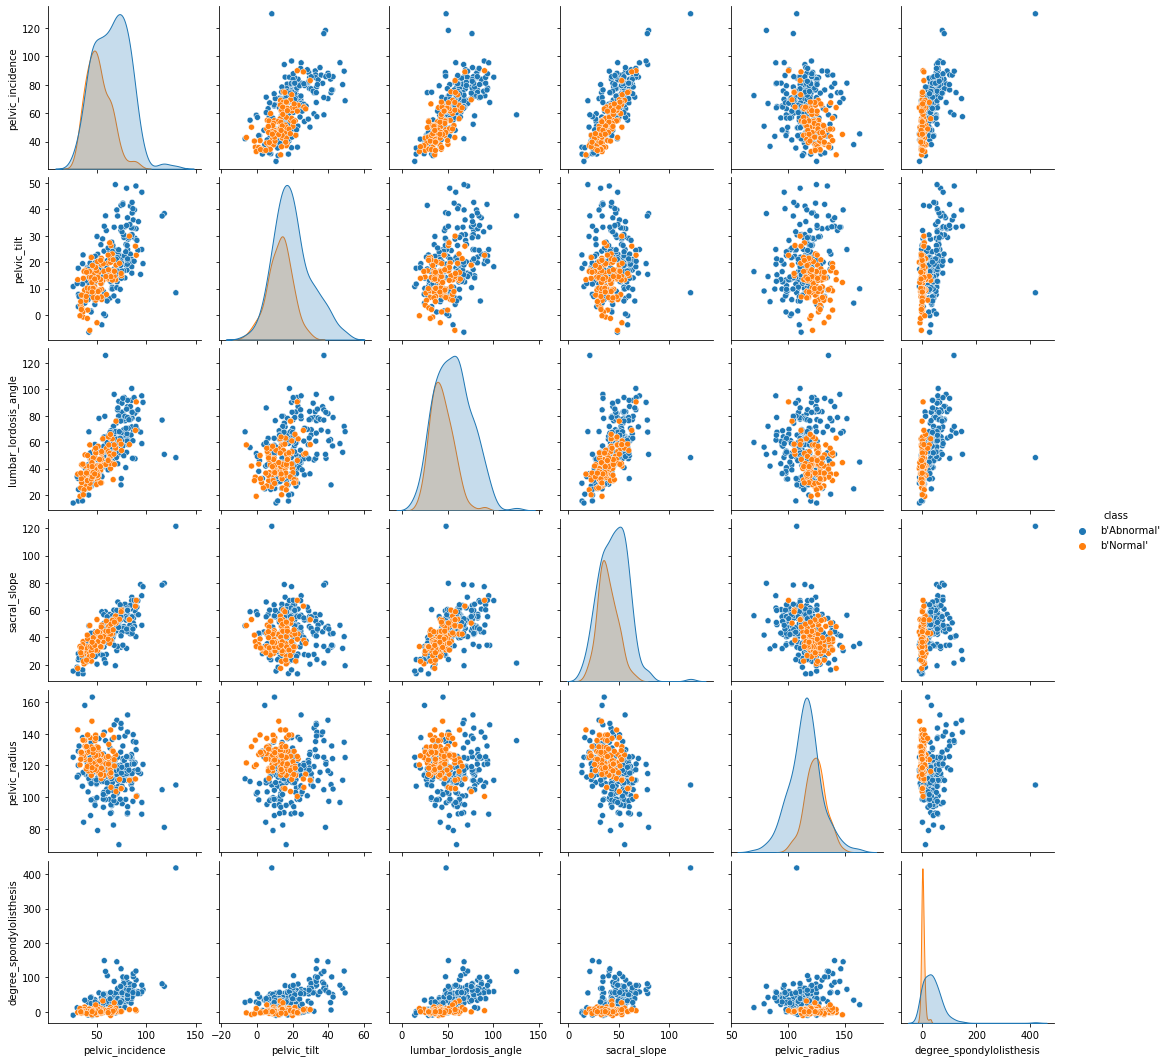

In [5]:
sns.pairplot(df1, hue = "class")
#, diag_kind="hist"

## ii.  Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

In [6]:
df1.columns.drop('class')

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [7]:
df1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [8]:
df = df1.copy()

In [9]:
df = df1.replace(b'Abnormal', 1)
df = df.replace(b'Normal', 0)

In [10]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


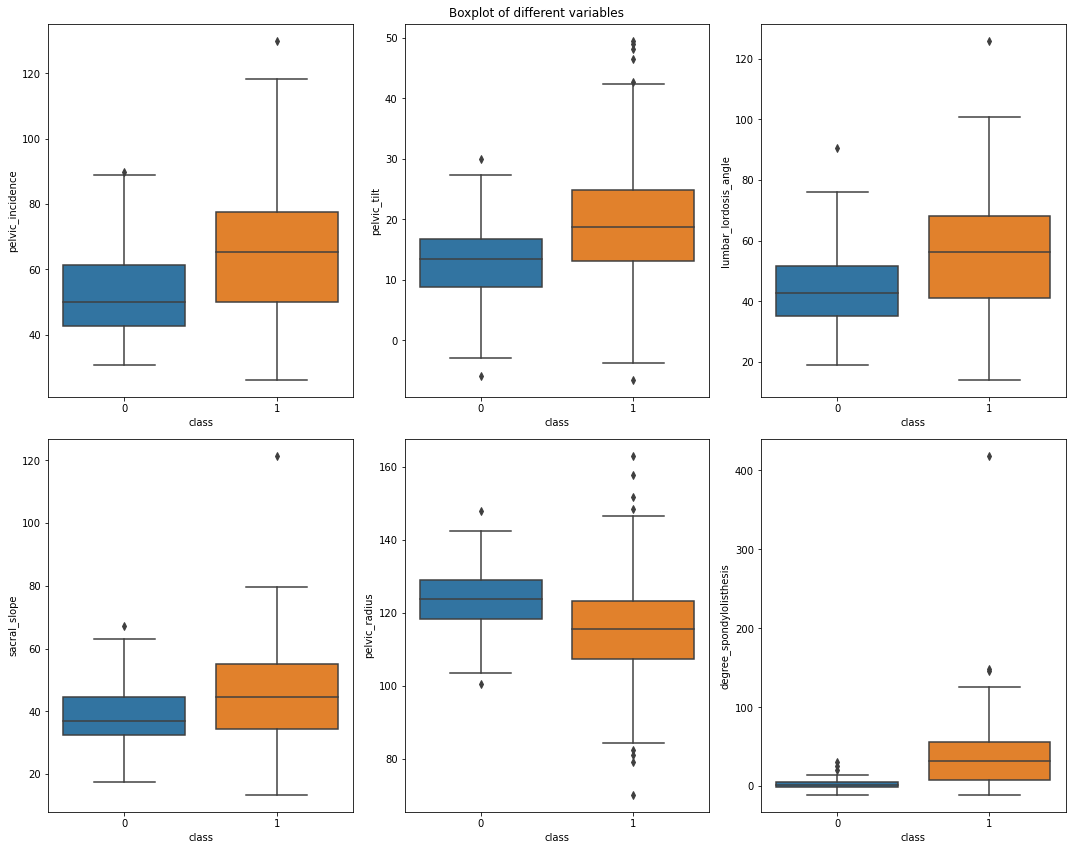

In [11]:
fig, axes = plt.subplots(2,3, figsize = (15,12)) 
sns.boxplot(y = "pelvic_incidence" , x = "class", data = df, orient = 'v', ax = axes[0,0])
sns.boxplot(y = "pelvic_tilt" , x = "class", data = df, orient = 'v', ax = axes[0,1])
sns.boxplot(y = "lumbar_lordosis_angle" , x = "class", data = df, orient = 'v', ax = axes[0,2])
sns.boxplot(y = "sacral_slope" , x = "class", data = df, orient = 'v', ax = axes[1,0])
sns.boxplot(y = 'pelvic_radius' , x = 'class', data = df, orient = 'v', ax=axes[1,1])
sns.boxplot(y = "degree_spondylolisthesis" , x = "class", data = df, orient = 'v', ax = axes[1,2])
fig.suptitle('Boxplot of different variables')
fig.tight_layout()

## iii.)Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set 

In [12]:
AB = df1[df1['class'] == b'Abnormal']
NO = df1[df1['class'] == b'Normal']

In [13]:
AB.loc[:, 'class'] = 1
NO.loc[:, 'class'] = 0

/Users/charlieblah/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
#training set
train1 = NO.iloc[:70]
train2 = AB.iloc[:140]
X = pd.concat([train1,train2])

In [15]:
#Test set
test1 = NO.iloc[70:]
test2 = AB.iloc[140:]
y = pd.concat([test1, test2])

In [16]:
# split the data into independent and dependent variable
X_train = X.drop(['class'], axis = 1)
y_train = X['class']
X_test = y.drop(['class'], axis = 1)
y_test = y['class']
X_train1 = X_train.copy()
y_train1 = y_train.copy()

In [17]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [18]:
X_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159


## (c) Classification using KNN on Vertebral Column Data Set

## i.) Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')

In [20]:
X_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159


In [21]:
X_train.iloc[1:2]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
211,54.920858,18.96843,51.601455,35.952428,125.846646,2.001642


In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [23]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [24]:
euc_list=[]
i_list=[]
class_list=[]
for i in range(len(X)):
    i_list.append(i)
    euc_list.append(euclidean_distances(X_train.iloc[:1], X_train.iloc[i:i+1]))
    class_list.append(X.iloc[i,6])

In [25]:
df15 = pd.DataFrame()
df15 = df15.assign(i = i_list, Distance = euc_list, classes = class_list )
df15

,i,Distance,classes
0,0,[[0.0]],0
1,1,[[28.143641157809387]],0
2,2,[[21.01470942171666]],0
3,3,[[20.750418468779138]],0
4,4,[[21.573632313470362]],0
...,...,...,...
205,205,[[99.41628630078036]],1
206,206,[[91.45340018283706]],1
207,207,[[83.56435731955082]],1
208,208,[[81.36478684752893]],1


In [26]:
df15 = df15.sort_values(by = ['Distance'])

In [27]:
df15.head(6)

,i,Distance,classes
0,0,[[0.0]],0
103,103,[[9.59931829074316]],1
88,88,[[10.30213508748804]],1
61,61,[[11.505454805868071]],0
59,59,[[11.559018826070197]],0
118,118,[[11.901544498630463]],1


### The table above shows the distances of the points that's close to the first row from training data.

## ii.) Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [28]:
# Make the list of the range of k
k = list(range(1,209, 3))
k.reverse()

In [29]:
accuracy = []
train_scores = []
test_scores = []

In [30]:
for i, val in enumerate(k):
    knn = KNeighborsClassifier(n_neighbors = val, p = 2, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score1 = 1 - train_score
    test_score1 = 1 - test_score
    train_scores.append(train_score1)
    test_scores.append(test_score1)

(208.0, 0.0)

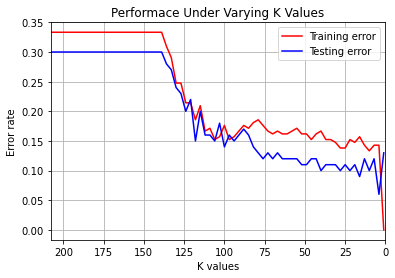

In [31]:
#Plot train and test error
plt.plot(k, train_scores, color='red',label='Training error')
plt.plot(k, test_scores, color='blue',label='Testing error')
plt.xlabel('K values')
plt.ylabel('Error rate')
plt.legend()
plt.grid()
plt.title('Performace Under Varying K Values') 
plt.xlim(208, 0)

### The graph shown above is the training and testing error rate with their corresponding K values.

In [32]:
df2 = pd.DataFrame()
df2 = df2.assign(k = k, test_error = test_scores)
df2

,k,test_error
0,208,0.30
1,205,0.30
2,202,0.30
3,199,0.30
4,196,0.30
...,...,...
65,13,0.12
66,10,0.10
67,7,0.12
68,4,0.06


In [33]:
# highest accuracy rate, and corresponding k value
df2.loc[df2['test_error'].idxmin()]

k             4.00
test_error    0.06
Name: 68, dtype: float64

In [34]:
# Knn for k = 4
knn = KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [35]:
# confusion matrix for knn when k = 4
cm1 = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm1)
#True positive 25% and true negative rate is 69%

,0,1
0,25,5
1,1,69


In [36]:
True_P = 69/ (1+69)
True_N = 25 / (25+5) 

In [37]:
#Precision
Precision = precision_score(y_test, y_pred)

In [38]:
#F1 score
f1 = f1_score(y_test, y_pred)

In [39]:
print('True_P rate:', True_P)
print('True_N rate:', True_N)
print('Precision:', Precision)
print('F1_score:', f1)

True_P rate: 0.9857142857142858
True_N rate: 0.8333333333333334
Precision: 0.9324324324324325
F1_score: 0.9583333333333333


### The true positive rate is about 0.99, true negative rate is about 0.833, prcision is about 0.93 and the F1 score is about 0.958

## iii.) Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [40]:
# Make range for K
# k = list(range(1,207, 5))
k = list(range(1, 207, 5))

In [41]:
# Make range for N
# N = list(range(10, 211, 10))
N = list(range(10, 211, 10))

In [42]:
#for i, val in enumerate(N):
#    i1 = 0
#    while k[i1] < N[i]:
#        print(N[i] - k[i1])
#        
#        if i1 <= len(k):
#            i1 += 1
#            if i1 == len(k):
#                break
#                break

In [43]:
accuracy2 = []
k1 = []
N1 = []
train_scores = []
test_scores = []

In [44]:
#train1 = NO.iloc[:6]
#train2 = AB.iloc[:6]
#X = pd.concat([train1,train2])
#X_train = X.drop(['class'], axis = 1)
#y_train = X['class']
#knn = KNeighborsClassifier(n_neighbors = 16, p = 2, metric = 'euclidean')
#knn.fit(X_train, y_train)

In [45]:
for i, val in enumerate(N):
    i1 = 0
    while k[i1] < N[i]:
        r = N[i]/3
        r = int(r)
        r1 = N[i] - r
        train1 = NO.iloc[:r]
        train2 = AB.iloc[:r1]
        #r = N[i]/3
        #r = int(r)
        #train1 = NO.iloc[:r]
        #train2 = AB.iloc[:r]
        X = pd.concat([train1,train2])
#       if len(X) >= k[i1]: #n_sample has to be bigger than n_neighbor
        X_train1 = X.drop(['class'], axis = 1)
        y_train1 = X['class']

        knn = KNeighborsClassifier(n_neighbors = k[i1], p = 2, metric = 'euclidean')
        knn.fit(X_train1, y_train1)

        train_score = knn.score(X_train1,y_train1)
        test_score = knn.score(X_test,y_test)
        train_score1 = 1 - train_score
        test_score1 = 1 - test_score

          
        k1.append(k[i1])
        N1.append(N[i])
        train_scores.append(train_score1)
        test_scores.append(test_score1)
        
        if i1 <= len(k):
            i1 += 1
            if i1 == len(k):
                break
        else:
            break
    df3 = pd.DataFrame()
    df3 = df3.assign(N = N1, k = k1, 
                     train_error = train_scores, test_error = test_scores)

In [46]:
df3.head(10)

,N,k,train_error,test_error
0,10,1,0.000000,0.25
1,10,6,0.100000,0.33
2,20,1,0.000000,0.22
3,20,6,0.150000,0.20
4,20,11,0.300000,0.29
5,20,16,0.300000,0.30
6,30,1,0.000000,0.22
7,30,6,0.133333,0.24
8,30,11,0.166667,0.26
9,30,16,0.233333,0.26


In [47]:
df4 = pd.DataFrame()
df5 = pd.DataFrame()

In [48]:
for i in N:
    df4 = df3.loc[df3['N'] == i]
    df4 = df4.loc[df4['test_error'].idxmin()]
    df5 = df5.append(df4)

In [49]:
df5

,N,k,test_error,train_error
0,10.0,1.0,0.25,0.000000
3,20.0,6.0,0.20,0.150000
6,30.0,1.0,0.22,0.000000
14,40.0,11.0,0.25,0.200000
25,50.0,26.0,0.30,0.320000
34,60.0,21.0,0.29,0.266667
47,70.0,26.0,0.29,0.271429
62,80.0,31.0,0.29,0.300000
80,90.0,41.0,0.29,0.300000
91,100.0,6.0,0.26,0.180000


Text(0.5, 1.0, 'Learing Curve')

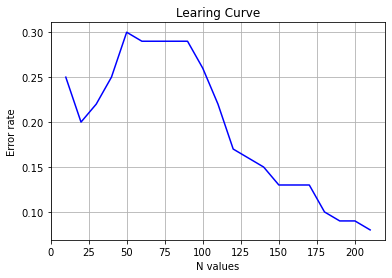

In [50]:
#Plot train and test error
plt.plot(N, df5['test_error'], color='blue', label='Testing Accuracy')
plt.xlabel('N values')
plt.ylabel('Error rate')
plt.grid()
plt.title('Learing Curve') 

### The graph shown above is the learning curve

## (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

## i.) Minkowski Distance:
## A. which becomes Manhattan Distance with p = 1.

In [51]:
# Make the list of the range of k
k2 = list(range(1,197, 5))

In [52]:
train_scores1 = []
test_scores1 = []
k3 = []

In [53]:
for i, val1 in enumerate(k2):
    knn = KNeighborsClassifier(n_neighbors = val1, p = 1)
    knn.fit(X_train, y_train)
    ##this added to make the n_neighbor less than n_sample
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score2 = 1 - train_score
    test_score2 = 1 - test_score
    train_scores1.append(train_score2)
    test_scores1.append(test_score2)
    k3.append(val1)

In [54]:
df6 = pd.DataFrame()
df6 = df6.assign(k = k3,test_error = test_scores1, train_error = train_scores1)
df6.loc[df6['test_error'].idxmin()]

k              1.00
test_error     0.11
train_error    0.00
Name: 0, dtype: float64

In [55]:
df13 = df6[round(df6['test_error'],2) == 0.11]
df13

,k,test_error,train_error
0,1,0.11,0.000000
1,6,0.11,0.138095
2,11,0.11,0.142857
5,26,0.11,0.166667


In [56]:
df13[df13['train_error'] == df13['train_error'].nsmallest(2).iloc[-1] ]

,k,test_error,train_error
1,6,0.11,0.138095


### The table shown above is the smallest test error with corresponding K, I didn't pick the k=1 due to concerns of overfitting

## B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [57]:
import math 

In [58]:
N2 = np.linspace(0.1,1,10)
N3 = pow(10,N2)

In [59]:
train_scores3 = []
test_scores3 = []
log = []

In [60]:
# k = 1 for set in N2
for i, val2 in enumerate(N3):
    knn = KNeighborsClassifier(n_neighbors = 6, p = val2)
    knn.fit(X_train, y_train)
    ##this added to make the n_neighbor less than n_sample
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score4 = 1 - train_score
    test_score4 = 1 - test_score
    train_scores3.append(train_score4)
    test_scores3.append(test_score4)
    log.append(val2)

In [61]:
df7 = pd.DataFrame()
df7 = df7.assign(p = N2, test_error = test_scores3)
df7

,p,test_error
0,0.1,0.09
1,0.2,0.09
2,0.3,0.08
3,0.4,0.08
4,0.5,0.08
5,0.6,0.06
6,0.7,0.07
7,0.8,0.08
8,0.9,0.09
9,1.0,0.09


In [62]:
df7.loc[df7['test_error'].idxmin()]

p             0.60
test_error    0.06
Name: 5, dtype: float64

### The above show the smallest test error with corresponding K for log(10)p

## C. which becomes Chebyshev Distance with p → ∞

In [63]:
train_scores4 = []
test_scores4 = []
k4 = []

In [64]:
# k = 1 for p = inf
for i, val3 in enumerate(k2):
    knn = KNeighborsClassifier(n_neighbors = val3, metric = 'chebyshev')
    knn.fit(X_train, y_train)
    ##this added to make the n_neighbor less than n_sample
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score5 = 1 - train_score
    test_score5 = 1 - test_score
    train_scores4.append(train_score5)
    test_scores4.append(test_score5)
    k4.append(val3)

In [65]:
df8 = pd.DataFrame()
df8 = df8.assign(k = k4, test_error = test_scores4)
df8.loc[df8['test_error'].idxmin()]

k             16.00
test_error     0.08
Name: 3, dtype: float64

### The above show the smallest test error with corresponding K for Chebyshev

## ii. Mahalanobis Distance

In [66]:
train_scores5 = []
test_scores5 = []
k5 = []

In [67]:
type(X_train)

pandas.core.frame.DataFrame

In [68]:
np.linalg.inv(np.cov(X_train, rowvar = False))

array([[ 4.41757190e+12, -4.41757190e+12, -2.03462148e+02,
        -4.41757190e+12, -9.08742736e+01, -3.49650821e+00],
       [-4.41757190e+12,  4.41757190e+12,  2.03456737e+02,
         4.41757190e+12,  9.08758269e+01,  3.49485812e+00],
       [-2.03462112e+02,  2.03456701e+02,  8.04108758e-03,
         2.03454746e+02, -1.81344606e-03,  3.60057009e-04],
       [-4.41757190e+12,  4.41757190e+12,  2.03454783e+02,
         4.41757190e+12,  9.08786043e+01,  3.49408117e+00],
       [-9.08741656e+01,  9.08757189e+01, -1.81344606e-03,
         9.08784963e+01,  8.78435158e-03, -6.61909457e-04],
       [-3.49637958e+00,  3.49472949e+00,  3.60057009e-04,
         3.49395254e+00, -6.61909457e-04,  1.17556888e-03]])

In [69]:
d = np.linalg.inv(np.cov(X_train, rowvar = False))
d = d.tolist()

In [70]:
for i, val3 in enumerate(k2):
    knn = KNeighborsClassifier(n_neighbors = val3, metric = 'mahalanobis',
                               metric_params = {'VI': np.linalg.inv(np.cov(X_train, rowvar = False))
                                               ,'V': np.cov(X_train, rowvar= False)})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score5 = 1 - train_score
    test_score5 = 1 - test_score
    train_scores5.append(train_score5)
    test_scores5.append(test_score5)
    k5.append(val3)

In [71]:
df9 = pd.DataFrame()
df9 = df9.assign(k = k5, test_error = test_scores5, train_error = train_scores5)
df9.loc[df9['test_error'].idxmin()]

k              1.00
test_error     0.15
train_error    0.00
Name: 0, dtype: float64

### The above show the smallest test error with corresponding K for Mahalanobis 

## (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [72]:
train_scores6 = []
test_scores6 = []
k6 = []

In [73]:
train_scores7 = []
test_scores7 = []
k7 = []

In [74]:
train_scores8 = []
test_scores8 = []
k8 = []

In [75]:
for i, val in enumerate(k2):
    knn = KNeighborsClassifier(n_neighbors = val, metric = 'euclidean', weights ='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score1 = 1 - train_score
    test_score1 = 1 - test_score
    train_scores6.append(train_score1)
    test_scores6.append(test_score1)
    k6.append(val)

In [76]:
df10 = pd.DataFrame()
df10 = df10.assign(k = k6, test_error = test_scores6, train_error = train_scores6)
df10 = df10.loc[df10['test_error'].idxmin()]
df10

k              6.0
test_error     0.1
train_error    0.0
Name: 1, dtype: float64

In [77]:
for i, val in enumerate(k2):
    knn = KNeighborsClassifier(n_neighbors = val, p = 1 , weights ='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score1 = 1 - train_score
    test_score1 = 1 - test_score
    train_scores7.append(train_score1)
    test_scores7.append(test_score1)
    k7.append(val)

In [78]:
df11 = pd.DataFrame()
df11 = df11.assign(k = k7, test_error = test_scores7, train_error = train_scores7)
df11 = df11.loc[df11['test_error'].idxmin()]
df11

k              26.0
test_error      0.1
train_error     0.0
Name: 5, dtype: float64

In [79]:
for i, val in enumerate(k2):
    knn = KNeighborsClassifier(n_neighbors = val, metric = 'chebyshev' , weights ='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score1 = 1 - train_score
    test_score1 = 1 - test_score
    train_scores8.append(train_score1)
    test_scores8.append(test_score1)
    k8.append(val)

In [80]:
df12 = pd.DataFrame()
df12 = df12.assign(k = k8, test_error = test_scores8, train_error = train_scores8)
df12 = df12.loc[df12['test_error'].idxmin()]
df12

k              16.00
test_error      0.11
train_error     0.00
Name: 3, dtype: float64

In [81]:
df14 = pd.DataFrame()

In [82]:
df14 = df14.assign(Euclidean = df10, Manhattan = df11, Chebyshev= df12)
df14.transpose()

,k,test_error,train_error
Euclidean,6.0,0.10,0.0
Manhattan,26.0,0.10,0.0
Chebyshev,16.0,0.11,0.0


### The above table summarize three different metrics for their k and test_error

## (f) What is the lowest training error rate you achieved in this homework?

## The lowest training error rate I have achieved in this homework is 0